# Ridge linear regression example

**Example using the ridge linear regression function in the stepAIC module**

The **ridge** function in the stepAIC module provides output of regression models and summary statistics using the following methods:

- RidgeCV: RidgeCV regression with default cross-validation using the MSE as the scoring criterion to optimize alpha
- RidgeAIC: Ridge regression using AIC as the scoring criterion to optimize alpha by trial
- RidgeBIC: Ridge regression using BIC as the scoring criterion to optimize alpha by trial
- RidgeVIF: Ridge regression using target VIF to optimize alpha by trial

The **ridge** function standardizes the X input by default. 

This example shows how to test the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

Before running this notebook, first install the stepAIC module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [1]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

## Read X and y from the sklearn diabetes data set

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into training and testing subsets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting Ridge regression models, please wait ...


Ridge regression statistics of best models in model_outputs['stats']:


| Statistic          |         RidgeCV |        RidgeAIC |        RidgeBIC |        RidgeVIF |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     1.23285     |     0.001       |     0.001       |    46.4159      |
| r-squared          |     0.527526    |     0.527919    |     0.527919    |     0.520303    |
| adjusted r-squared |     0.512285    |     0.512691    |     0.512691    |     0.504829    |
| n_samples          |   353           |   353           |   353           |   353           |
| df residuals       |   342           |   342           |   342           |   342           |
| df model           |    10           |    10           |    10           |    10           |
| F-statistic        |    38.185       |    38.2453      |    38.2453      |    37.0951      |
| Prob (F-statistic) |

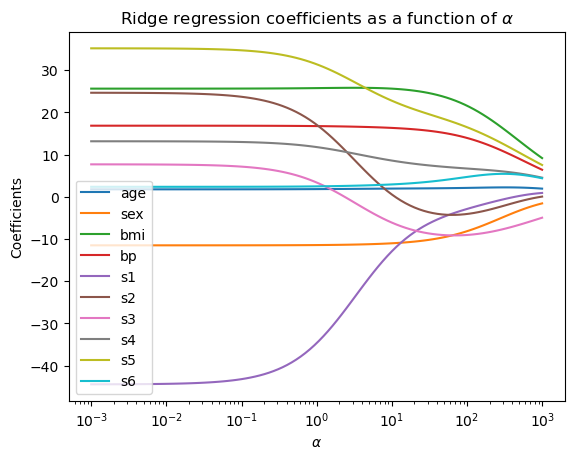

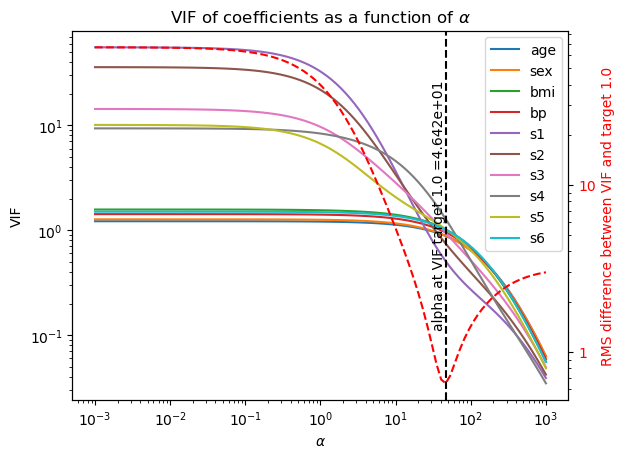

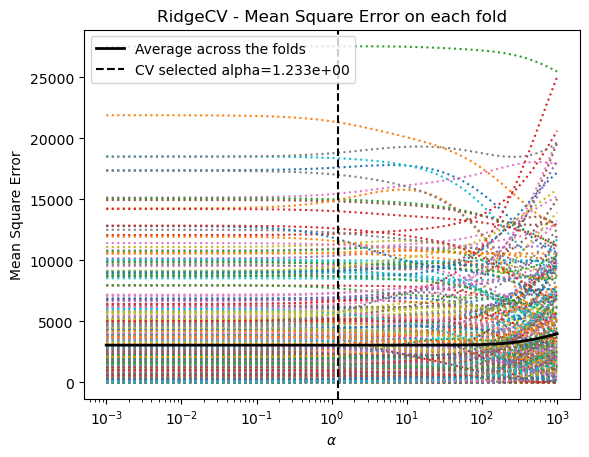

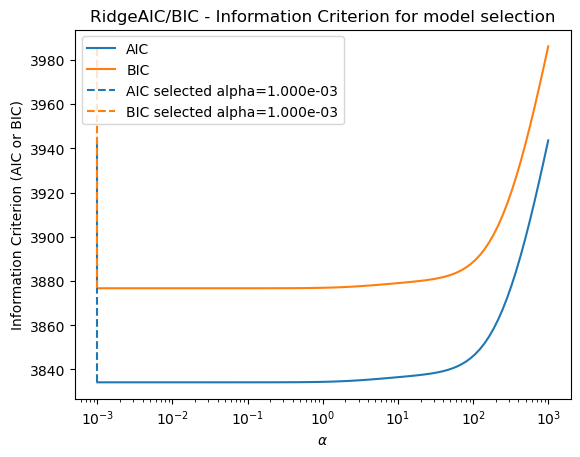

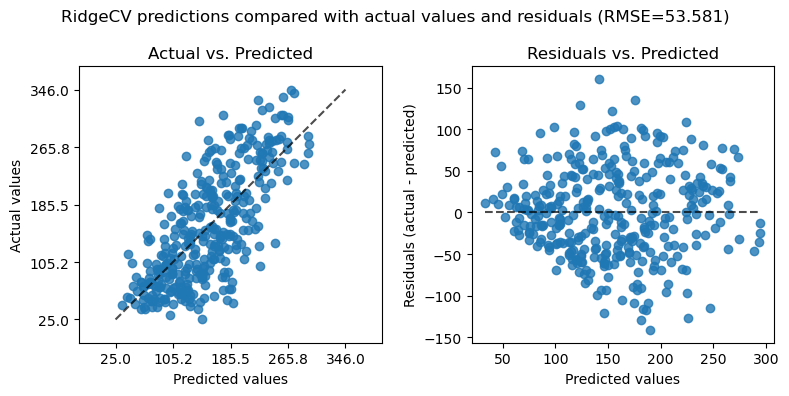

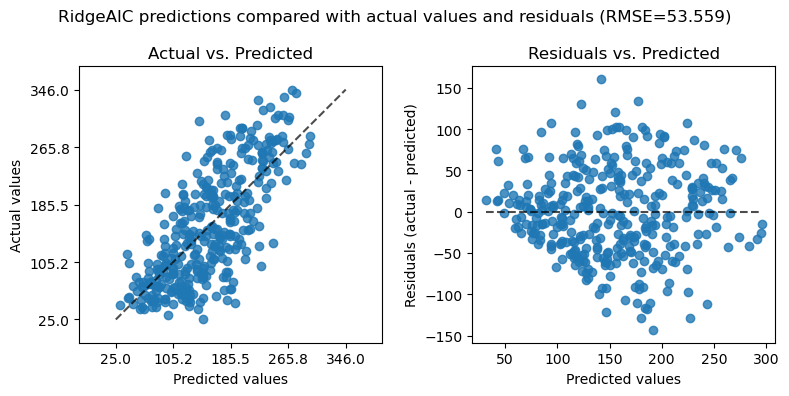

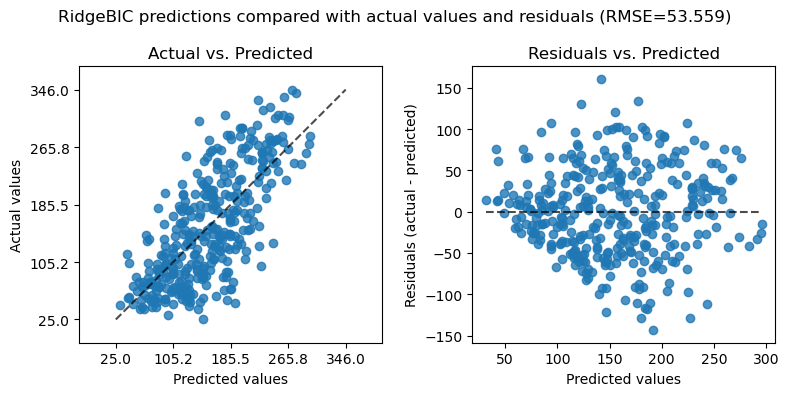

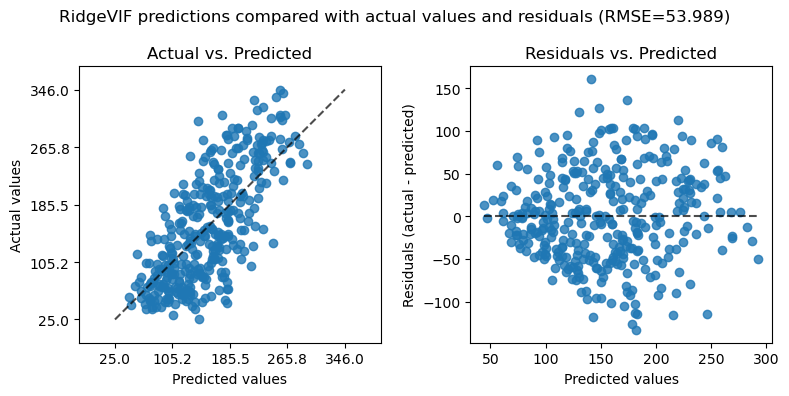

In [4]:
# Use the stacking function in the stepAIC module
from stepAIC import ridge
train_model, train_output = ridge(X_train, y_train)

## Test the model with the testing data subset

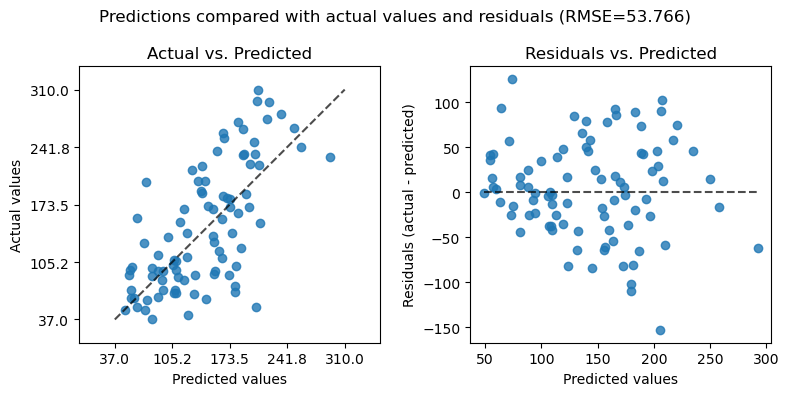

In [5]:
from stepAIC import plot_predictions_from_test
fig = plot_predictions_from_test(
    train_model['RidgeCV'], X_test, y_test, scaler=train_output['scaler'])
fig.savefig("RidgeCV_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

Fitting Ridge regression models, please wait ...


Ridge regression statistics of best models in model_outputs['stats']:


| Statistic          |         RidgeCV |        RidgeAIC |        RidgeBIC |        RidgeVIF |
|:-------------------|----------------:|----------------:|----------------:|----------------:|
| alpha              |     1.87382     |     0.001       |     0.001       |    53.367       |
| r-squared          |     0.51733     |     0.517748    |     0.517748    |     0.511683    |
| adjusted r-squared |     0.504982    |     0.505412    |     0.505412    |     0.499191    |
| n_samples          |   442           |   442           |   442           |   442           |
| df residuals       |   431           |   431           |   431           |   431           |
| df model           |    10           |    10           |    10           |    10           |
| F-statistic        |    46.1949      |    46.2724      |    46.2724      |    45.1624      |
| Prob (F-statistic) |

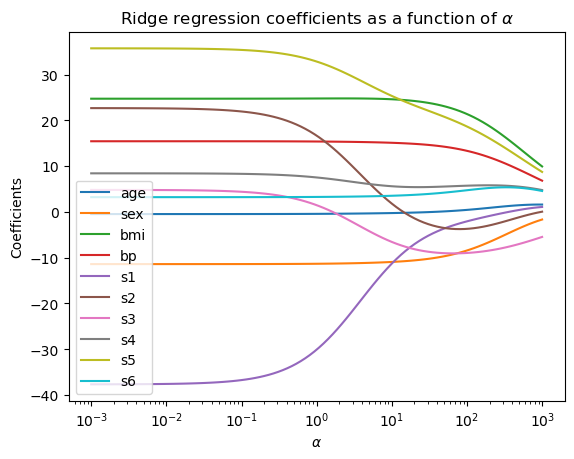

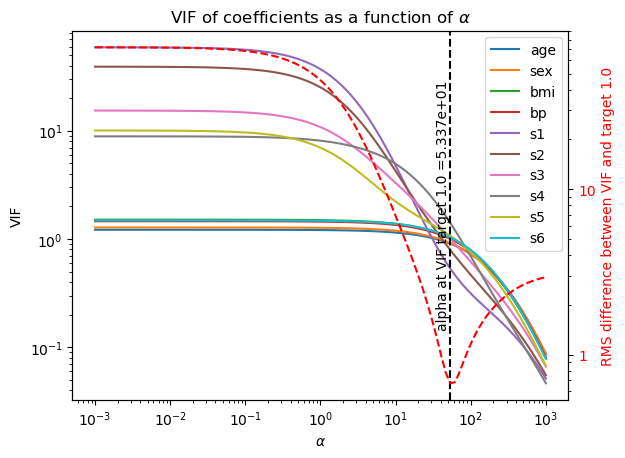

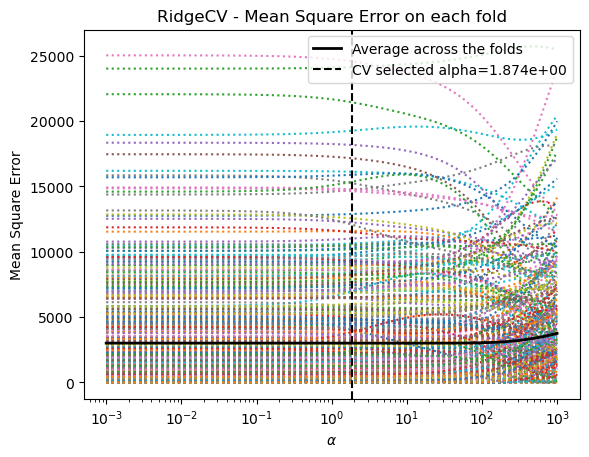

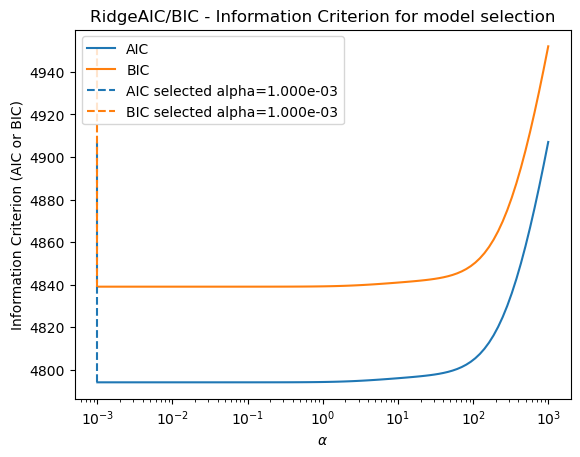

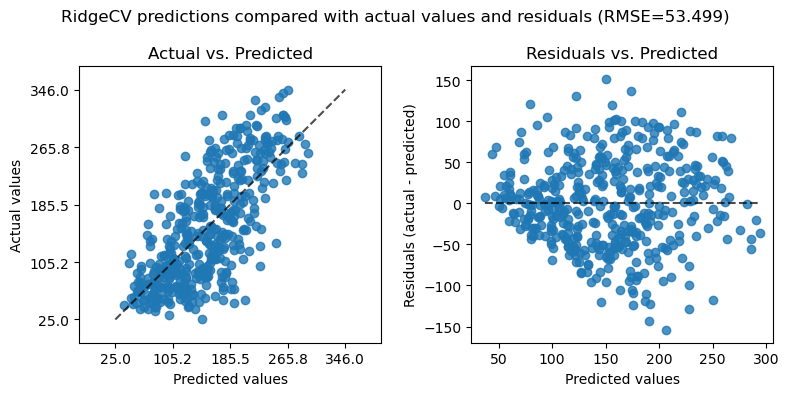

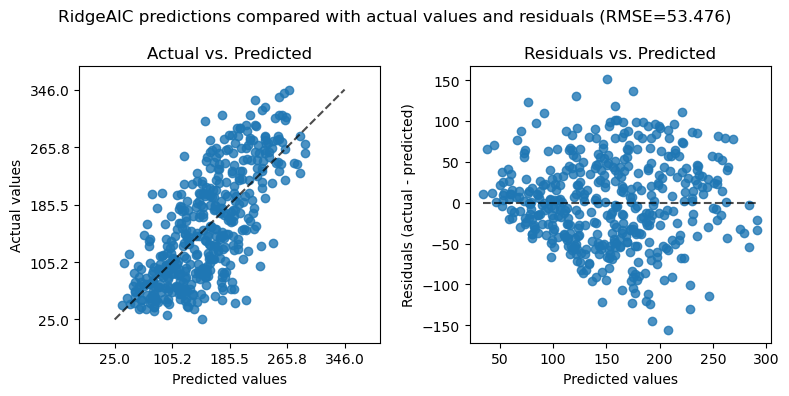

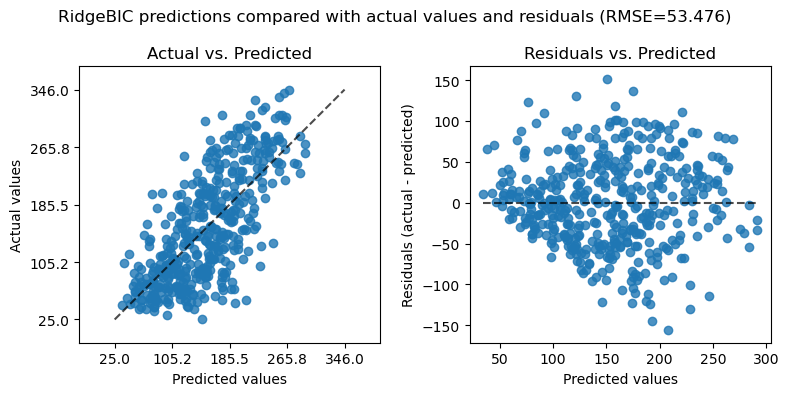

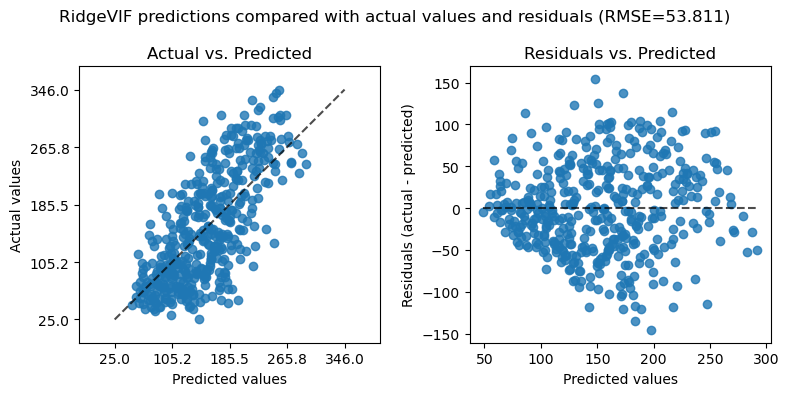

In [6]:
from stepAIC import ridge
final_model, final_output = ridge(X, y)

## User instructions

In [7]:
help(ridge)

Help on function ridge in module stepAIC:

ridge(X, y, **kwargs)
    Python function for Ridge linear regression

    by
    Greg Pelletier
    gjpelletier@gmail.com
    21-May-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        standardize= 'on' (default) or 'off' where
            'on': standardize X using sklearn.preprocessing StandardScaler
            'off': do not standardize X
        alpha_min= minimum value of range of alphas to evaluate (default=1e-3)
        alpha_max= maximum value of range of alphas to evaluate (default=1e3)
        n_alpha= number of log-spaced alphas to evaluate (default=100)
        vif_target= VIF target for use with RidgeVIF (default=1.0)
        verbose= 'o